<a href="https://colab.research.google.com/github/kiarminghaffari/kharazmi/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Importing the libraries

In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px

In [ ]:
!pip install pycaret

In [20]:
from pycaret.regression import *

## Load and Prepare Data

In [21]:
df = pd.read_csv('country_vaccinations.csv')

In [22]:
df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31235,Zimbabwe,ZWE,2021-07-11,1491397.0,895980.0,595417.0,NaN,18598.0,10.03,6.03,4.01,1251.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31236,Zimbabwe,ZWE,2021-07-12,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31237,Zimbabwe,ZWE,2021-07-13,1575539.0,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31238,Zimbabwe,ZWE,2021-07-14,1613640.0,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...


## EDA

In [23]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   iso_code                             31240 non-null  object 
 2   date                                 31240 non-null  object 
 3   total_vaccinations                   17451 non-null  float64
 4   people_vaccinated                    16554 non-null  float64
 5   people_fully_vaccinated              13795 non-null  float64
 6   daily_vaccinations_raw               14421 non-null  float64
 7   daily_vaccinations                   30948 non-null  float64
 8   total_vaccinations_per_hundred       17451 non-null  float64
 9   people_vaccinated_per_hundred        16554 non-null  float64
 10  people_fully_vaccinated_per_hundred  13795 non-null  float64
 11  daily_vaccinations_per_milli

In [25]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.745100e+04,1.655400e+04,1.379500e+04,1.442100e+04,3.094800e+04,17451.000000,16554.000000,13795.000000,30948.000000
mean,1.200444e+07,5.704551e+06,3.293973e+06,2.273661e+05,1.149718e+05,29.283554,19.181574,12.340698,3426.365969
std,6.622349e+07,2.101612e+07,1.234425e+07,1.258556e+06,8.460548e+05,35.042304,20.734193,15.857682,4572.377684
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.262015e+05,9.999100e+04,4.832450e+04,4.324000e+03,8.520000e+02,2.970000,2.580000,1.320000,412.000000
50%,8.890780e+05,6.450395e+05,3.632100e+05,2.133600e+04,6.471000e+03,14.510000,10.730000,5.560000,1851.000000
75%,4.213660e+06,2.809300e+06,1.635366e+06,9.441700e+04,3.545425e+04,44.460000,30.890000,17.610000,5123.000000
max,1.426347e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,232.350000,116.660000,115.690000,118759.000000


In [26]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [27]:
most_vac = df.groupby(['vaccines'])[['country','date', 'total_vaccinations']].sum().sort_values(by = 'total_vaccinations', ascending = False)
most_vac['Total_vac_per_million'] = round(most_vac['total_vaccinations']/1000000,2)
most_vac['Percent_of_total_vac'] = round(100* most_vac['total_vaccinations']/most_vac['total_vaccinations'].sum(),2)
most_vac.reset_index(inplace = True)
most_vac

<ipython-input-27-37a2111c87da>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_vac = df.groupby(['vaccines'])[['country','date', 'total_vaccinations']].sum().sort_values(by = 'total_vaccinations', ascending = False)


,vaccines,total_vaccinations,Total_vac_per_million,Percent_of_total_vac
0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",6.902029e+10,69020.29,32.95
1,"Johnson&Johnson, Moderna, Pfizer/BioNTech",3.353511e+10,33535.11,16.01
2,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",2.323977e+10,23239.77,11.09
3,"Covaxin, Oxford/AstraZeneca, Sputnik V",2.254141e+10,22541.41,10.76
4,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",1.893382e+10,18933.82,9.04
5,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",5.980547e+09,5980.55,2.85
6,"Moderna, Pfizer/BioNTech",4.992119e+09,4992.12,2.38
7,"Pfizer/BioNTech, Sinovac",4.155756e+09,4155.76,1.98
8,"Oxford/AstraZeneca, Sinovac",3.190381e+09,3190.38,1.52
9,"EpiVacCorona, Sputnik V",3.029756e+09,3029.76,1.45


## Data Preprocessing
## Prepare Data for Machine learning

In [12]:
df.fillna(df.mean(), inplace=True)

<ipython-input-12-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [13]:
setup(data = df, target = 'total_vaccinations', session_id=123)

,Description,Value
0,Session id,123
1,Target,total_vaccinations
2,Target type,Regression
3,Original data shape,"(27040, 15)"
4,Transformed data shape,"(27040, 15)"
5,Transformed train set shape,"(18928, 15)"
6,Transformed test set shape,"(8112, 15)"
7,Numeric features,8
8,Categorical features,6
9,Preprocess,True


## Strorytelling - Visualization

<ipython-input-28-20cf3a5b6abe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['daily_vaccinations_per_million'].sort_values().plot(kind='bar')


<Axes: >

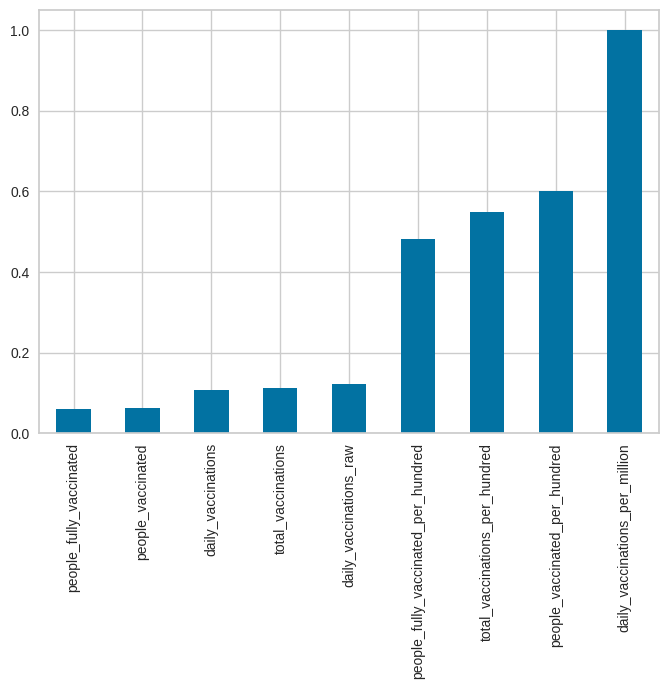

In [28]:
df.corr()['daily_vaccinations_per_million'].sort_values().plot(kind='bar')

In [30]:
fig=px.choropleth(data_frame=df,
                          locations=df['country'],
                          locationmode='country names',
                          color=df['daily_vaccinations_per_million'],
                          animation_frame=df['date'],
                          animation_group=df['vaccines'])
fig.update_layout(dict1={'title':'Daily Vaccinations Per Million'})

fig.show()

In [32]:
s=df.drop_duplicates(subset=['iso_code'])['vaccines'].apply(lambda x: x.split(','))
dic={}
for i in s:
    for j in i :
        if j[0]==' ':
            k= j[1:]
        elif j[-1]==' ':
            k=j[:-1]
        else:
            k=j
        if k not in dic :
            dic[k]=1
        else:
            dic[k]+=1
px.bar(x=list(dic.keys()),y=list(dic.values()),color=list(dic.keys()),template='plotly_dark',labels={'x':'Vaccine Name','y':'Total Count'})


## Train your model
## Test the model and show the metrics

In [14]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,252491.1444,34648700354884.6328,5256129.0121,0.9866,0.3296,7.0235,4.9910
gbr,Gradient Boosting Regressor,752501.9268,47446969831756.0391,5573301.7515,0.9831,1.3852,68.8820,4.5750
lightgbm,Light Gradient Boosting Machine,683648.1924,83931224087311.4062,8856690.9361,0.9631,0.9404,8.4255,0.7010
xgboost,Extreme Gradient Boosting,532935.9406,120456503676108.7969,8414034.5750,0.9597,0.9757,15.3365,3.1790
rf,Random Forest Regressor,472193.6722,129780031874037.2812,8921614.3522,0.9569,0.3095,0.8554,15.7270
dt,Decision Tree Regressor,474031.9515,172551147434084.2500,9679229.8803,0.9349,0.2442,0.2071,0.4960
en,Elastic Net,5636189.6120,333034020020240.1875,16946164.9279,0.8606,2.3459,700.2591,0.8320
lasso,Lasso Regression,5654121.6805,333032081626755.8125,16951998.7094,0.8605,2.3426,679.8144,0.6580
ridge,Ridge Regression,5653019.2482,333030392904448.8125,16951821.0683,0.8605,2.3419,678.5388,0.3240
lr,Linear Regression,5652955.8061,333002613710471.7500,16951239.4427,0.8605,2.3432,678.5043,1.0640


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [34]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,78631.3880,460343118573.5114,678485.9015,0.9992,0.1988,0.2395
1,190540.1018,31808163170620.8906,5639872.6201,0.9827,0.3567,0.1208
2,557653.4197,115438312774855.4688,10744222.2973,0.9705,0.2841,0.3328
3,140038.0389,7330661984032.2510,2707519.5261,0.9969,0.5703,0.3804
4,267283.0185,25388646583239.6523,5038714.7749,0.9901,0.2561,0.0530
5,263828.4670,24934256906193.4141,4993421.3628,0.9875,0.2475,0.2637
6,362683.4603,62078126555860.5703,7878967.3534,0.9791,0.2432,0.2420
7,177981.9143,17092353381670.7168,4134289.9489,0.9894,0.4027,57.7135
8,205164.2655,15368769962175.8281,3920302.2794,0.9939,0.3931,10.7834


Processing:   0%|          | 0/4 [00:00<?, ?it/s]